In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# สร้างข้อมูลจำลอง
np.random.seed(0)
weight = np.array([0.5, 1.0, 1.5, 2.0]).reshape(-1, 1)
size = np.array([1.05, 1.9, 3.2, 4.1])

Linear Regression residuals: 0.04
Ridge Regression (alpha=0):
    residuals = 0.04
    penalty = 0.00
    total = 0.04
Ridge Regression (alpha=1):
    residuals = 1.12
    penalty = 1.35
    total = 2.46
Ridge Regression (alpha=10):
    residuals = 4.35
    penalty = 0.54
    total = 4.89
Ridge Regression (alpha=100):
    residuals = 5.36
    penalty = 0.07
    total = 5.43
Ridge Regression (alpha=1000):
    residuals = 5.48
    penalty = 0.01
    total = 5.49


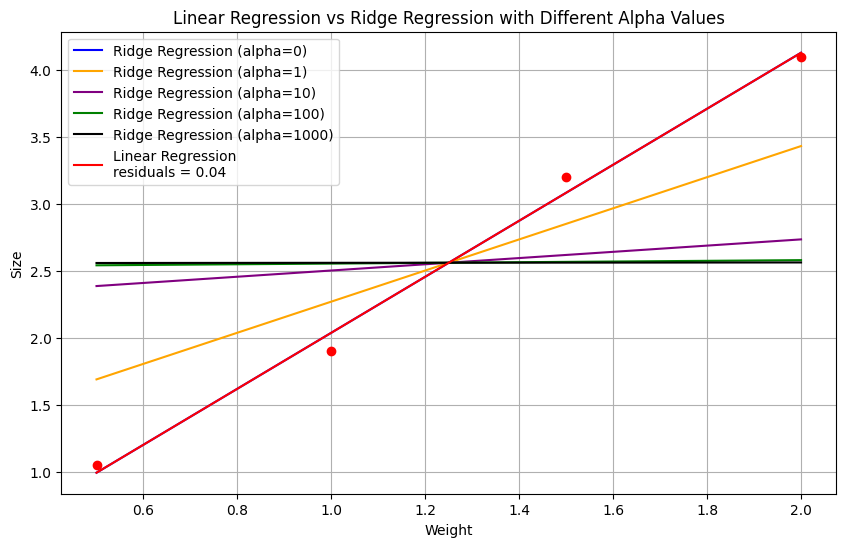

In [11]:
# การถดถอยเชิงเส้น (Linear Regression)
linear_reg = LinearRegression()
linear_reg.fit(weight, size)
linear_fit = linear_reg.predict(weight)
linear_residuals = np.sum((size - linear_fit)**2)
print(f'Linear Regression residuals: {linear_residuals:.2f}')


# การถดถอย Ridge (Ridge Regression) สำหรับค่าแลมดาต่างๆ
alphas = [0, 1, 10, 100, 1000]
#alphas = [0]
colors = ['blue', 'orange', 'purple', 'green', 'black']
#colors = ['blue']
labels = [f'(alpha={alpha})' for alpha in alphas]

plt.figure(figsize=(10, 6))

# ข้อมูลการฝึก
plt.scatter(weight, size, color='red', zorder=5)

# สร้างเส้น Ridge Regression สำหรับแต่ละค่า alpha
for alpha, color, label in zip(alphas, colors, labels):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(weight, size)
    ridge_fit = ridge_reg.predict(weight)
    ridge_residuals = np.sum((size - ridge_fit)**2)
    ridge_penalty = alpha * np.sum(ridge_reg.coef_**2)
    
    print(f'Ridge Regression {label}:')
    print(f'    residuals = {ridge_residuals:.2f}')
    print(f'    penalty = {ridge_penalty:.2f}')
    print(f'    total = {ridge_residuals + ridge_penalty:.2f}')
    
    plt.plot(weight, ridge_fit, color=color, 
             label=f'Ridge Regression {label}')


# เส้นการถดถอยเชิงเส้น
plt.plot(weight, linear_fit, color='red', 
         label=f'Linear Regression\nresiduals = {linear_residuals:.2f}')

# แสดงผลลัพธ์
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.title('Linear Regression vs Ridge Regression with Different Alpha Values')
plt.grid(True)

# แสดงผลกราฟ
plt.show()

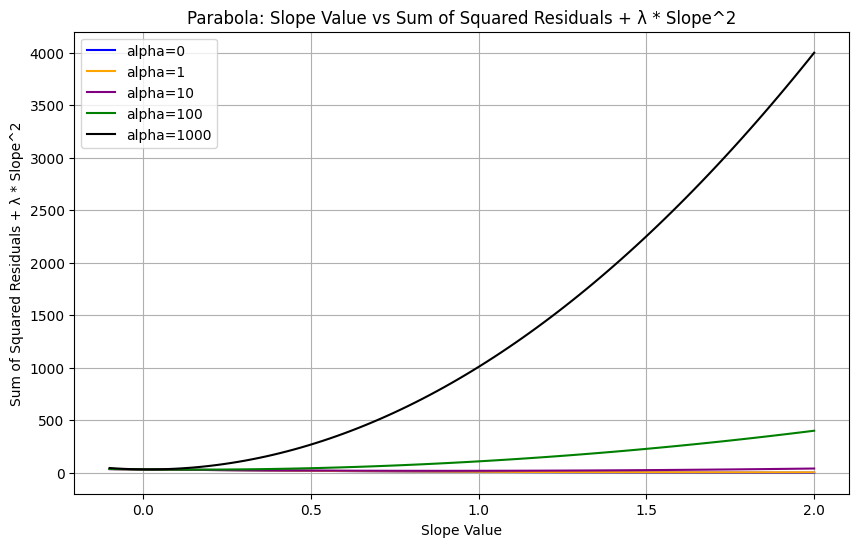

In [12]:
# สร้างค่า slope ที่ต้องการทดลอง
slopes = np.linspace(-0.1, 2.0, 100)

plt.figure(figsize=(10, 6))

# คำนวณ Sum of Squared Residuals + λ * Slope^2 สำหรับแต่ละ alpha และแต่ละ slope
for alpha, color in zip(alphas, colors):
    total_costs = []
    for slope in slopes:
        predictions = slope * weight.flatten()
        residuals = np.sum((size - predictions) ** 2)
        penalty = alpha * slope**2
        total_cost = residuals + penalty
        total_costs.append(total_cost)
    
    # พล็อตกราฟ Parabola ระหว่าง slope กับ (Sum of Squared Residuals + λ * Slope^2)
    plt.plot(slopes, total_costs, color=color, label=f'alpha={alpha}')



plt.xlabel('Slope Value')
plt.ylabel('Sum of Squared Residuals + λ * Slope^2')
plt.title('Parabola: Slope Value vs Sum of Squared Residuals + λ * Slope^2')
plt.grid(True)
plt.legend()
plt.show()